# Least Squares, PCA, SVD, Linearization Walkthrough

### CSM EECS 16A/16B: Designing Information Devices and Systems I/II, Fall 2023

In this iPython notebook, we'll be going over least squares, PCA (principal component analysis), SVD (singular value decomposition), and linearization. These methods are useful in data analysis and prediction! PCA and SVD will be shown after least squares, so if you're taking 16A right now, it's (probably) not in scope for you to know topics other than least squares for now. However, I encourage you to still take a look and see if there are any familiar terms.

This notebook will have few parts that require user input other than running certain blocks of code, so please make sure to run the code block if it says to run it. Code blocks that require user input will not be extensive since this is *not* meant as a substitute to actual lectures, discussions, and homeworks.

This is meant as a supplement to learning, so if there is anything that seems weirdly worded or if you would like any clarifications please email <span style=color:blue>damanicluck@berkeley.edu.</span>.

Without further ado, lets begin! 
<!---

This is a test run written by Damanic Luck, Fall 2023. I this notebook and alex wrote the lin alg one. If you're clicking on this comment, congrats! idk what people will do with this, but hopefully its helpful. feel free to email me at damanicluck@berkeley.edu if you see this comment! :D. i was a sophmore when i wrote this so like if it seems limited in anyway thats probably why. i was like taking 70/61c and i was just deciding what upper divs to take so im definitely not an expert in any way possible i just tried researching this as much as i could and asked for help proofreading

---!>

# Credit
Written by Damanic Luck, Fall 2023. During the process of writing, formatting from EECS16A Touch Lab1 and 3D plots from EECS16B Lab were referenced

Revision Credit:
* beep
* boop


# Table of Contents

### Least Squares
* [Least Squares Introduction](#lst_sq_instruct)
* [Least Squares Motivation and Geometric Derivation](#lst_sq_motivation)
* [Limitations](#lst_sq_limits)

### SVD (Singular Value Decomposition)
* [SVD Introduction](#svd_instruct)
* [Motivation and Derivation]()
* [Limitations]()

### PCA (Principal Component Analysis)
* [PCA Introduction](#pca_instruct)
* [Motivation and Derivation]()
* [Limitations]()

### Linearization
* [Linearization Introduction](#lin_instruct)
* [Motivation and Derivation]()
* [Limitations]()

In [2]:
# Run this block before you start this walkthrough

import matplotlib.pyplot as plt
import numpy as np
import time

# Commented out bc this is for a built in quiz function but idk if i want it anumore
# from ipywidgets import interact, interactive, interact_manual
# import ipywidgets as widgets
# from IPython.display import display

from PIL import Image, ImageOps

# from IPython.display import Image
# you might have to do 'pip install jupyterquiz' for this block to work but this is just a test for more interaction in the future
# from jupyterquiz import display_quiz
##display_quiz(insert link for testing later)

#we need this line to have visualizations within this notebook
%matplotlib inline

<a id = 'lst_sq_instruct'></a>
##  Least Squares Introduction
Before we start, review what the column space and the null space of a matrix are.

<a id = 'lst_sq_motivation'></a>
## Least Squares Motivation and Derivation
Why should we learn about least squares? Let's say in a lab setting you are trying to analyze data and form some linear equation that can model and predict future behavior of your system.

In this walkthrough, we'll be going over the geometric derivation of least squares. Week 11 of Fall 2023 features a least squares question walking you through how to derive it via the *algebraic* method. The proof is also in 16A course notes.

<a id = 'svd_instruct'></a>
## SVD Introduction
This introduction relies on you reading the corresponding 16B course notes since it is relatively short and may not go into extreme depth.

|             |  $U$ | $\Sigma$ | $V^T$ |
|:------------| :----| :--------| :---- |
|Outer Product| 
|Compact      |
|Full         |

Note that all matrices can be represented via SVD (which is shown in the first code block). <span style="color:pink"> Input a height and width for A_matrix and then run the code block. </span>

SVD is a useful tool in low-rank approximations, due to the $\Sigma$ (big Sigma) matrix's properties.
<span style="color:red"> TODO: expand upon the introduction</span>

<a id = 'svd_motivation'></a>
One application of SVD you might see would be in image compression.<sup>1</sup> You can use any picture, but I've provided a picture already. Just drag into the same directory as this iPython notebook and change what the image url each time that we need it. We're doing this in grayscale and also feel free to play around with the code.

In [ ]:
# Code block 1
n = 4 #user input
m = 2 #user input
A_matrix = np.random.rand(n, m) #Generates a random matrix of n by m
U, E, V = np.linalg.svd(A_matrix, full_matrices=True) #Generates full SVD
Uc, Ec, Vc = np.linalg.svd(A_matrix ,full_matrices=False) #Generates compact SVD

#(Un)comment or replace U/Uc with other variables as needed
print("A_matrix:\n", A_matrix)
print("U, E, or V:\n", U) 
print("Uc, Ec, or Vc:\n", Uc)

In [42]:
#Run this block for some functions that are used later
def display_image(name, image, width, height):
    plt.figure(figsize=(width, height))
    plt.title(name)
    plt.imshow(image, cmap='gray')
    plt.axis('on')
    plt.show()

name = "Cool cat"
path = "svd_ex.png"

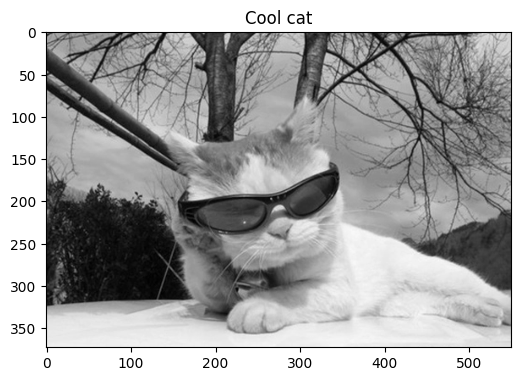

Rows: 373
Columns: 550


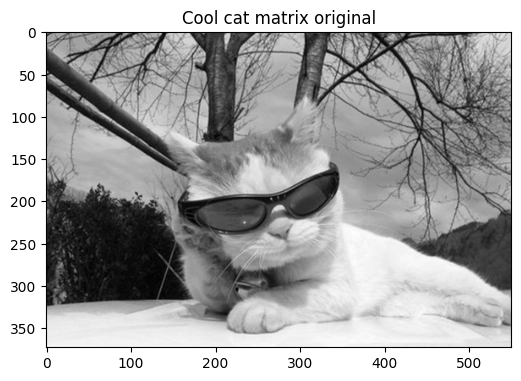

In [57]:
# Run this box to see the picture we're trying to compress
image = Image.open(path).convert('LA')
display_image(name, image, 6 , 9)

# Here we turn the image into a numpy matrix and then compute its SVD
npmat = np.array(list(image.getdata(band=0)), float)
npmat.shape = (image.size[1], image.size[0])
npmat = np.matrix(npmat)
U, Sigma, Vt = np.linalg.svd(npmat)

#Printing dimensions of the image
mat_rows, mat_cols = np.shape(npmat)
print("Rows: " + str(mat_rows) + "\nColumns: "+ str(mat_cols))

# Display the numpy matrix to see that its not different from the original image
display_image("Cool cat matrix original", npmat, 6, 9)

Notice that above the matrix original image of your choice that the amount of rows and columns are printed out. As an excercise for the following images, calculate the percentage of the original data used. In other words, let $n$ represent the number of vectors of the $U$ matrix you're using, so that 

* % of original data used $= \frac{n \cdot rows + n + n \cdot cols}{rows * cols}$

For the code block using 150 and 300 vectors, the picture quality looks extremely similar. Here we show how SVD is useful in maintaining decent image quality while also reducing the amount of space we are taking up for the image. 

One last thing to note is in the notation of the $V$ variable. The np.linalg.svd() function returns $V^T$, $V$ transpose. $V$ has orthonormal columns, meaning that $V^T$ will have orthonormal rows, hence why the notations for accessing the $U$ and $V^T$ matrix are different.

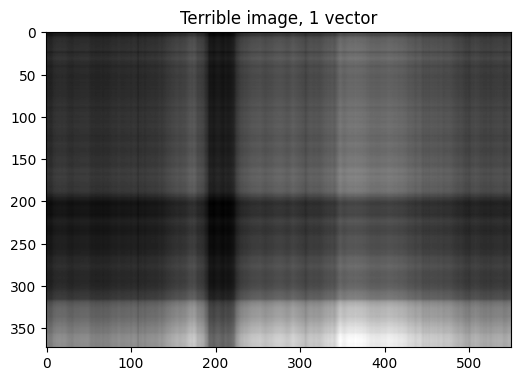

In [48]:
# Run to see a terrible image
bad_img = np.matrix(U[:,:1]) * np.diag(Sigma[:1]) * np.matrix(Vt[:1,:])
display_image("Terrible image, 1 vector", bad_img, 6, 9)

Slightly better images


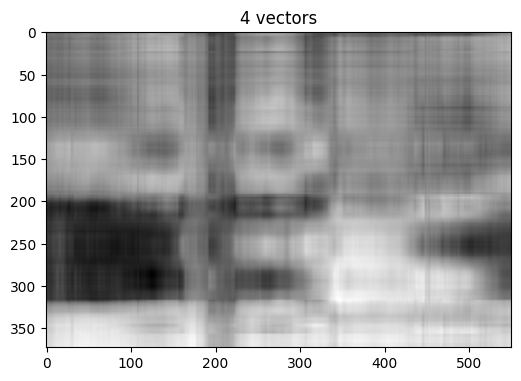

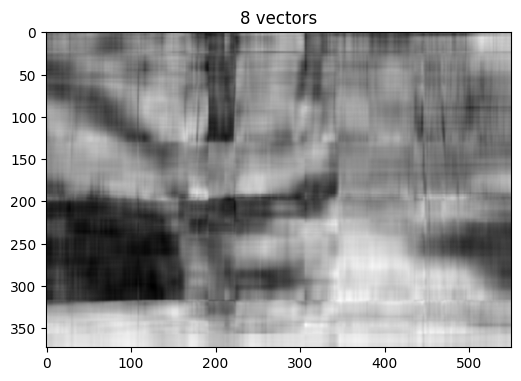

In [51]:
# Run to see a better image
# Can use xrange to iterate over a larger range to make it more memory efficient
print("Slightly better images")
for i in [4,8]:
    getting_better = np.matrix(U[:,:i]) * np.diag(Sigma[:i]) * np.matrix(Vt[:i,:])
    display_image(str(i)+" vectors", getting_better, 6, 9)

Even better images


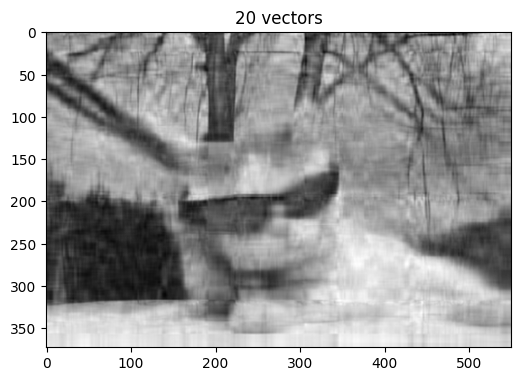

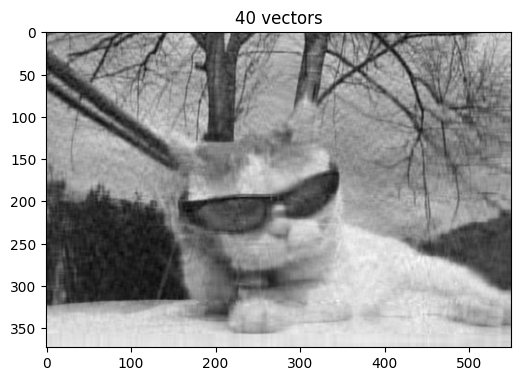

In [55]:
print("Even better images")
for i in [20, 40]:
    even_better = np.matrix(U[:,:i]) * np.diag(Sigma[:i]) * np.matrix(Vt[:i,:])
    display_image(str(i)+" vectors", even_better, 6, 9)

Amazing image


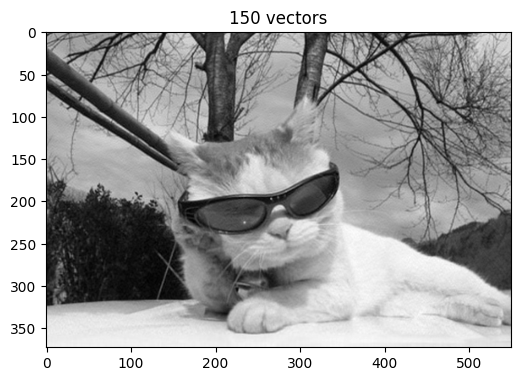

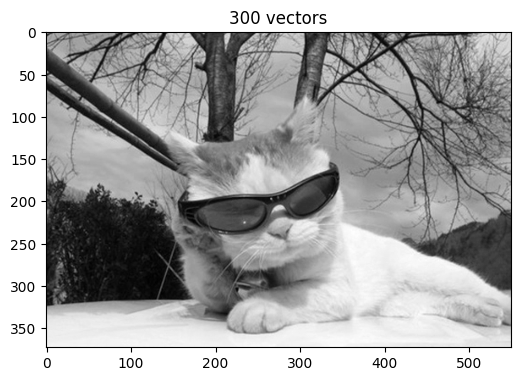

In [56]:
print("Amazing image")
for i in [150, 300]:
    yipee_image = np.matrix(U[:,:i]) * np.diag(Sigma[:i]) * np.matrix(Vt[:i,:])
    display_image(str(i)+" vectors", yipee_image, 6, 9)

<a id = 'pca_instruct'></a>
## PCA Introduction

Now that we've covered SVD, we proceed to PCA! This is placed after the SVD section, since SVD will be what happens "under the hood" for PCA. [check validity of this statement later or this the other way around oops]. PCA is generally used for dimensionality reduction and data compression. Let's review the following so that we can form a basis for understanding PCA.<sup>2</sup>
* Variance
    * Is the square root of the standard deviation
    * Is a measure of the spread of data
* Eigenvectors/eigenvalues
    * $A \vec{v} = \lambda \vec{v}$
    * According to the Spectral Theorem, eigenvectors of a symmetric matrice ($AA^T$ or $A^TA$) are orthogonal to each other and its eigenvalues are also real
        * Try to verify that $AA^T$ and $A^TA$ are symmetric matrices

Here we are trying to maximize variance. In this analogy, think of a color wheel. To maximize variance, where you must choose 3 principal components, you would probably choose red, blue, and yellow since you can recreate other colors on this color wheel with the three colors you just chose.

<span style= "color:red"> TODO: i want to make this [spinning chart with a sliding thingie using ipywidgets](https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca) </span>

## PCA Procedure
1. Demean your data
    * This means that we subtract our data by the mean
    * EX: Original dataset = [1,2,3], De-meaned dataset = [-1, 0, 1]

<span style= "color:red"> TODO: Please find the motivation to finish this</span>


<a id = 'lin_intruct'></a>
# Linearization


# Sources
The appropriate text has been indicated with a number with credit
* [1: Frank Cleary](https://www.frankcleary.com/svdimage/)
* [2: Lindsay I. Smith](http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf)
